In [20]:
import numpy as np
import os
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Carreguem les imatges d'entrenament (FONT MATRÍCULA ESPANYOLA)
def load_images_from_folder(folder, label, image_size=(32, 32)):
    images = []
    labels = []
    # Per cada imatge de la carpeta, les processem i etiquetem
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = io.imread(img_path)
            # Redimensionem la imatge
            img_resized = transform.resize(img, image_size, anti_aliasing=True)
            # Aplanem la imatge
            img_flatten = img_resized.flatten()
            images.append(img_flatten)
            # Etiquetem la imatge
            labels.append(label)
    return images, labels

# Llista de caracters alfanumèrics 
caracteres = '0123456789BCDFGHJKLMNPRSTVWXYZ'

data = []
target = []

# Trobem el directori actual
base_path =  os.getcwd()

# Per cada caracter busquem la seva carpeta corresponent on hi ha les imatges que s'han d'etiquetar amb el caracter.
for char in caracteres:
    folder_path = os.path.join(base_path, char)
    images, labels = load_images_from_folder(folder_path, char)
    data.extend(images)
    target.extend(labels)

# Convertir a arrays numpy
data = np.array(data)
target = np.array(target)


# Entrenem el model 
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(data, target)

# Evaluem el model
#y_pred = clf.predict(data)

#print("Reporte de clasificación:")
#print(classification_report(y_test, y_pred))

#print("Matriz de confusión:")
#print(confusion_matrix(y_test, y_pred))

# 5. Mostra algunes prediccions realitzades
#print("Resultados de las predicciones en el conjunto de prueba:")
#for i in range(10):  
    #print(f"Imagen {i+1}:")
    #print(f"  Etiqueta real: {y_test[i]}")
   # print(f"  Predicción: {y_pred[i]}")

# Mostrem la precisió del model.
#from sklearn.metrics import accuracy_score
#precision = accuracy_score(y_test, y_pred)
#print(f"\nPrecisión del modelo en el conjunto de prueba: {precision*100:.2f}%")


SVC(kernel='linear', probability=True)

FUNCIÓ PER PREDIR IMATGES DE TEST

In [30]:
def predict_character(image_path, clf, image_size=(64, 64)):
    
    img = io.imread(image_path)
    img_resized = transform.resize(img, image_size, anti_aliasing=True)
    img_flatten = img_resized.flatten() 
    plt.imshow(img_resized, cmap='gray')
    plt.show()
    prediction = clf.predict([img_flatten])
    
    return prediction[0]




EXECUTEM LES IMATGES DE TEST

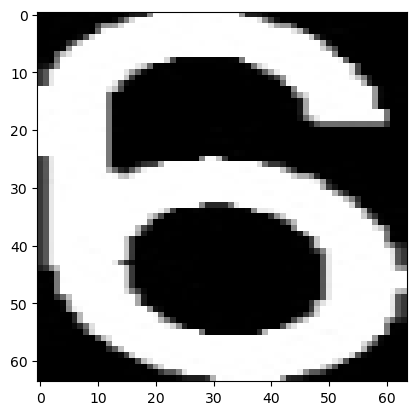

El carácter predicho es: 6


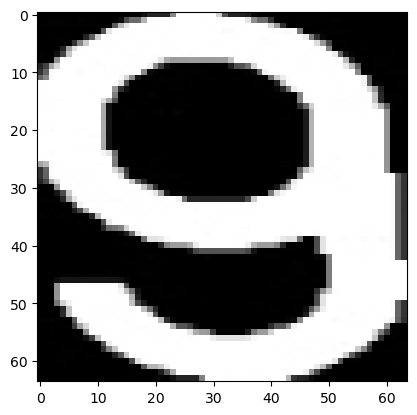

El carácter predicho es: 0


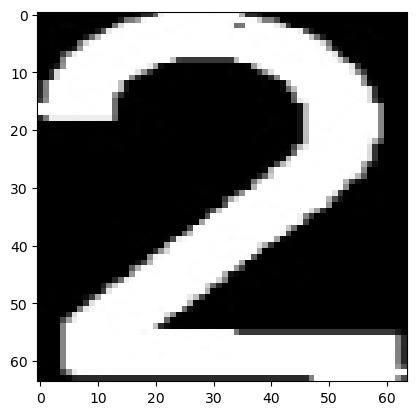

El carácter predicho es: W


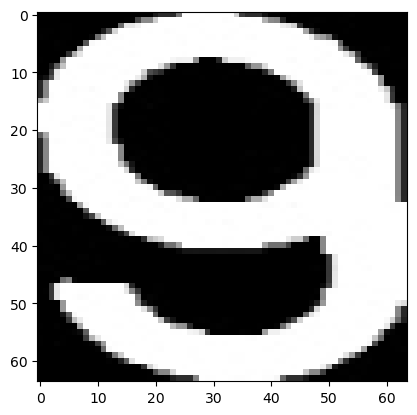

El carácter predicho es: 0


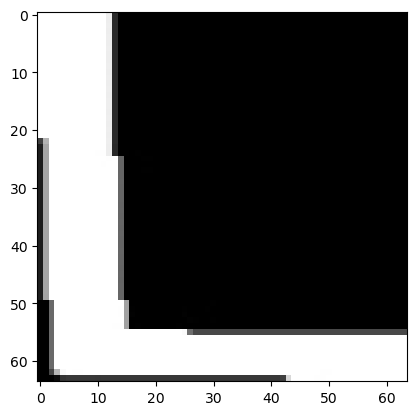

El carácter predicho es: M


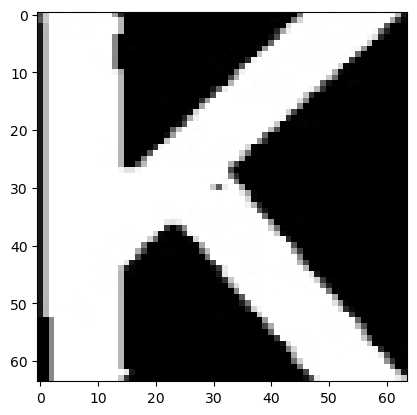

El carácter predicho es: X


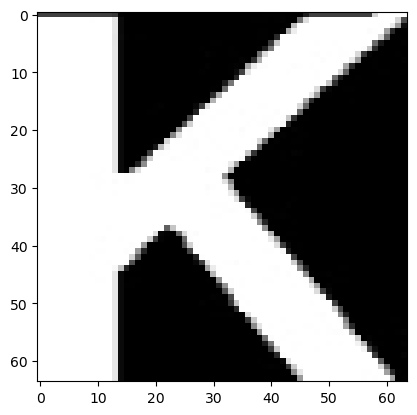

El carácter predicho es: X


In [31]:
# Ruta de la imagen del carácter segmentado
base_path =  os.getcwd()
base_path = f'{base_path}/predictions0'
for filename in os.listdir(base_path):
    img_path = os.path.join(base_path, filename)
    if os.path.isfile(img_path):
        prediction_character = predict_character(img_path, clf)
        print(f"El carácter predicho es: {prediction_character}")